# Title

## Introduction
Bike sharing has become a widely adopted means of transportation in urban areas, with its usage varying based on several factors such as seasons, working days versus holidays, and temperature. The Bike Sharing Dataset available in the UCI Machine Learning Repository encompasses data from 2011 to 2012, detailing the hourly and daily counts of rental bikes in the Capital bike share system, along with corresponding weather and seasonal information. This dataset serves as a valuable resource for examining the impact of these factors on the demand for bike sharing.

Seasons play a significant role in bike sharing usage, as people tend to be more inclined to ride bikes during warmer months. Moreover, the distinction between working days and holidays can also influence bike sharing demand, as people's transportation needs differ on these occasions. Additionally, temperature emerges as a crucial factor affecting bike sharing usage; extreme heat or cold may deter people from opting for bikes.

In conclusion, the Bike Sharing Dataset provides essential insights into how seasons, working days versus holidays, and temperature can influence bike sharing demand. Analyzing this data enables us to gain a deeper understanding of the factors influencing bike sharing usage and offers valuable information for enhancing bike sharing systems to better cater to user needs.

## Preliminary Results

First we install the necessary packages we need to read, clean and wrangle, and plot our data. These packages are `library(tidyverse)`, `library(repr)`, and `library(infer)`.

In [1]:
library(tidyverse)
library(repr)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


The link to the dataset we are using is https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset. We have uploaded our dataset to our project repository, and we use `read_csv()` to read it from the web into R.

In [2]:
bike_day_data <- read_csv("https://raw.githubusercontent.com/megannma/stat-201-2023s2-group-10/main/day.csv")
head(bike_day_data)

Rows: 731 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): instant, season, yr, mnth, holiday, weekday, workingday, weathers...
date  (1): dteday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


Because we will not use all of the variables in the dataset for our project, we clean and wrangle our data into a tidy format by only selecting the variables we will use. Using `select()`, we select `season`, `holiday`, `workingday`, `temp`, `atemp`, `casual`, `registered`, and `cnt`.

In [23]:
selected_bike_day_data <-
    bike_day_data %>%
    select(season, holiday, workingday, temp, atemp, casual, registered, cnt) %>%
    mutate(season = as.factor(season), holiday = as.factor(holiday), workingday = as.factor(workingday))
head(selected_bike_day_data)

season,holiday,workingday,temp,atemp,casual,registered,cnt
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0.344167,0.363625,331,654,985
1,0,0,0.363478,0.353739,131,670,801
1,0,1,0.196364,0.189405,120,1229,1349
1,0,1,0.200000,0.212122,108,1454,1562
1,0,1,0.226957,0.229270,82,1518,1600
1,0,1,0.204348,0.233209,88,1518,1606


Our first plot is a bar plot of users for each season:

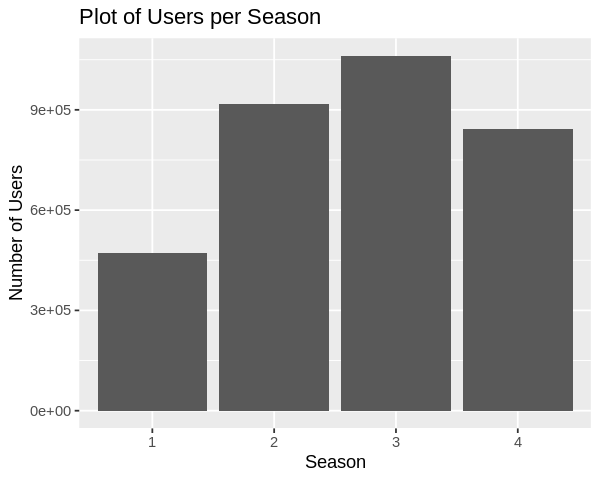

In [29]:
options(repr.plot.width = 5, repr.plot.height = 5)
season_plot <-
    selected_bike_day_data %>%
    ggplot(aes(x = season, y = cnt)) +
        geom_bar(stat = "identity") +
        labs(x = "Season", y = "Number of Users") +
        ggtitle("Plot of Users per Season")
season_plot

Our second and third plots are bar plots of users on working days vs. non working days and users on holidays vs. non holidays:

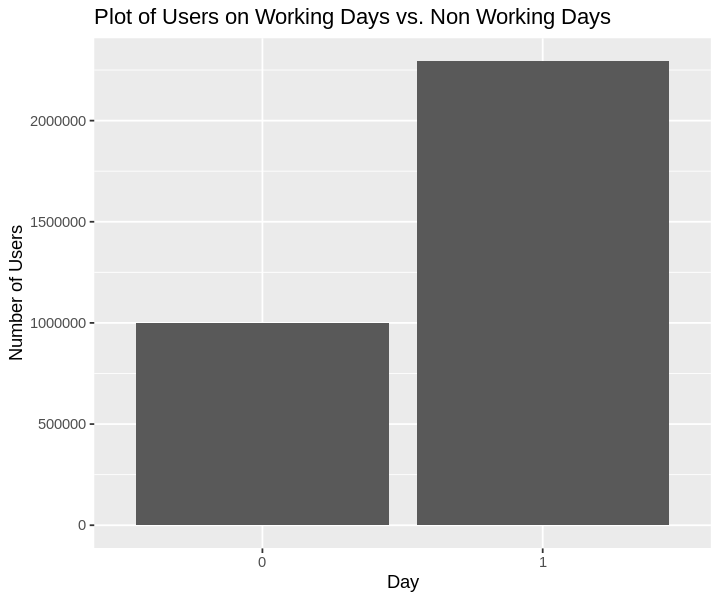

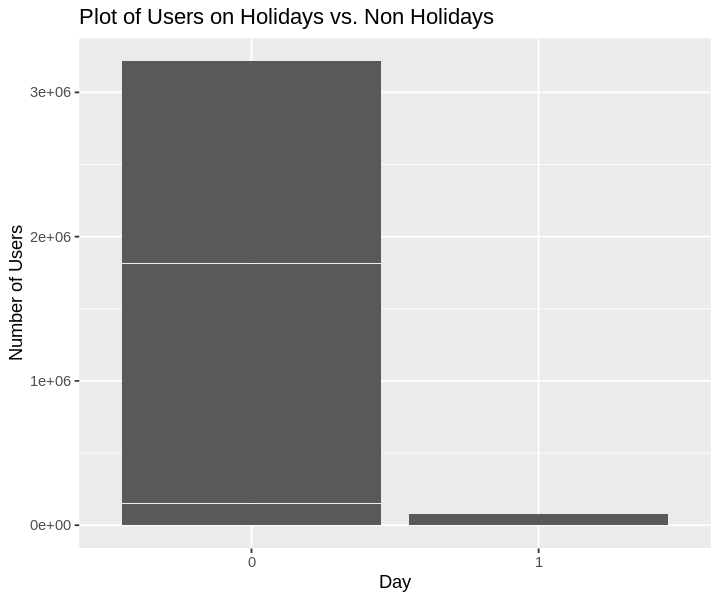

In [28]:
options(repr.plot.width = 6, repr.plot.height = 5)
workingday_plot <-
    selected_bike_day_data %>%
    ggplot(aes(x = workingday, y = cnt)) +
        geom_bar(stat = "identity") +
        labs(x = "Day", y = "Number of Users") +
        ggtitle("Plot of Users on Working Days vs. Non Working Days")
holiday_plot <-
    selected_bike_day_data %>%
    ggplot(aes(x = holiday, y = cnt)) +
        geom_bar(stat = "identity") +
        labs(x = "Day", y = "Number of Users") +
        ggtitle("Plot of Users on Holidays vs. Non Holidays")

workingday_plot
holiday_plot

Our fourth plot is a plot of users vs. temperature in normalized degrees Celsius:

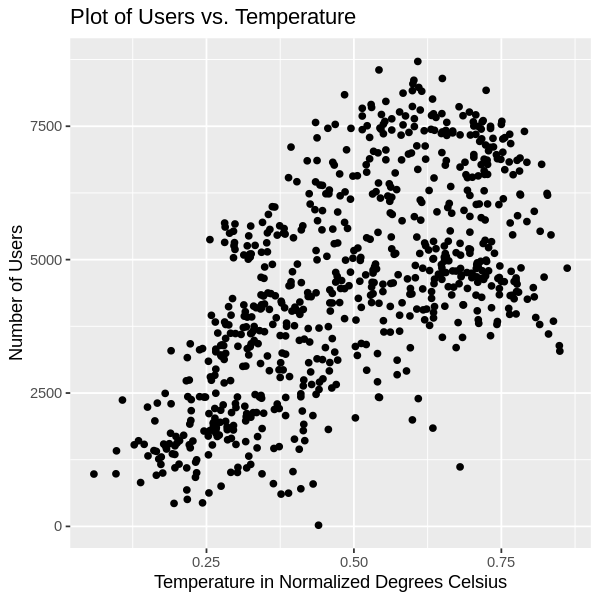

In [31]:
options(repr.plot.width = 5, repr.plot.height = 5)
temp_plot <-
    selected_bike_day_data %>%
    ggplot(aes(x = temp, y = cnt)) +
        geom_point() +
        labs(x = "Temperature in Normalized Degrees Celsius", y = "Number of Users") +
        ggtitle("Plot of Users vs. Temperature")
temp_plot

## Methods: Plan
Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

## References
1. El-Assi, W., Salah Mahmoud, M. & Nurul Habib, K. Effects of built environment and weather on bike sharing demand: a station level analysis of commercial bike sharing in Toronto. Transportation 44, 589–613 (2017). https://doi.org/10.1007/s11116-015-9669-z
2. UCI Machine Learning Repository: Bike Sharing Dataset. https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset